# Esercitazione 8

In questa esercitazione vogliamo applicare tecniche di ottimizzazione all'algoritmo di Metropolis per stimare l'energia e la distribuzione spaziale dello stato fondamentale di una particella uno-dimensionale in un potenziale a doppia buca.

## Ottimizzazione

Applicando il Principio Variazionale alla Meccanica quantistica, possiamo affermare che il valore di aspettazione di una Hamiltoniana in un qualsiasi stato quantistico di test e' maggiore dell'energia del ground state; essa e', quindi, il limite inferiore dell'energia: 

$$\langle {\hat H} \rangle_T = \frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}{\int dx |\Psi_T(x)|^2} \ge E_0 =\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}{\langle \Psi_0 | \Psi_0 \rangle}$$

In questa esercitazione ottimizzeremo, sfruttando un approccio variazionale, il ground state di una particella quantistica in 1D confinata in una doppia buca di potenziale:

$$V(x) = x^4 - \frac{5}{2}x^2$$

Per ottenere una funzione d'onda approssimata per il ground state, il Monte-Carlo variazionale usa una funzione d'onda di test parametrizzata da dei parametri variazionali. L'ansatz variazionale su cui la nostra trattazione si fonda e' che la funziona d'onda test sia la somma di due gaussiane parametrizzate da due parametri $\mu$ e $\sigma$:

$$\Psi_T^{\sigma,\mu}(x) \propto exp(-\frac{(x-\mu)^2}{2\sigma^2}) + exp(-\frac{(x+\mu)^2}{2\sigma^2})$$

Dato che utilizziamo l'algoritmo di Metropolis, non e' necessario calcolare la normalizzazione della funzione d'onda, compito che in problemi con piu' particelle in dimensioni maggiori e' spesso estremamente complesso, dato che il Metropolis lavora con rapporti tra probabilita' che nel nostro caso quantistico sara' proprio il modulo quadro di $\Psi_T^{\sigma,\mu}(x)$: la normalizzazione, percio', si semplifica!


## Esercizio 8.1

Costruiamo un codice Monte-Carlo per calcolare l'energia media di una singola particella in una dimensione che vive in un potenziale a doppia buca. Sfruttiamo l'algoritmo di Metropolis per spostare nello spazio la particella campionando il modulo quadro della funzione d'onda di test $|\Psi_T^{\sigma,\mu}(x)|^2$ con una probabilita' di transizione uniforme. L'acceptance del Metropolis, quindi, sara': 

$$A=min\left(1, \frac{|\Psi_T^{\sigma,\mu}(x_{try})|^2 T(x_{try}|x_{old})}{|\Psi_T^{\sigma,\mu}(x_{old})|^2T(x_{old}|x_{try})}\right)$$

dove $x_{old}$ e' la posizione attuale della particella, mentre $x_{try}$ quella proposta dal metropolis. L'espressione, pero', si semplifica dato che le probabilita' di transizione T sono uguali: utilizziamo, infatti, una probabilita' di transizione uniforme. \
Per effettuare una simulazione corretta col Metropolis dobbiamo assicurarci di avere circa il 50% di acceptance rate ad ogni blocco: modifichiamo, percio', la grandezza dell'intervallo in cui puo' essere "pescato" lo spostamento da $x_{old}$ per avere un rate di accettazione pari a $0.5$. \
Sfruttiamo il data blocking e implementiamo il valor medio della Hamiltoniana:

$$\langle {\hat H} \rangle_T = \frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}{\int dx |\Psi_T(x)|^2} = \int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = \frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}+ V(x)$$

in cui poniamo $\hbar = 1$ and $m=1$. \
Per ora implementiamo questo calcolo con valori di $\mu$ e $\sigma$ estrapolati ad occhio osservando l'andamento del potenziale calcolato analiticamente:
- mu = 1 ; 
- sigma = 0.5 .

## Esercizio 8.2

Per andare a stimare in maniera corretta l'energia del GS, sfruttando l'approccio variazionale per cui $E_0$ e' il limite inferiore del valore di aspettazione di H in una qualsiasi funzione d'onda, dobbiamo ottimizzare i nostri parametri variazionali. Per fare cio' rivestiamo il calcolo del valore di aspettazione dell'energia con il Simulated Annealing. \
Questa tecnica si basa sul considerare il nostro sistema come un sistema termodinamico che viene raffreddato in maniera lenta e controllata: in questo modo la mobilita' termica degli atomi del nostro sistema e' persa e essi si allineano formando un cristallo perfettamente ordinato che e' proprio lo stato di minima energia!

Vogliamo, quindi, scegliere una schedule di raffreddamento in cui mano a mano abbassiamo la temperatura, alziamo $\beta$, per simulare il nostro sistema come un "falso "cristallo.
Aggiungiamo al Metropolis per stimare il valor medio di energia muovendo la particella nello spazio, un secondo Metropolis che in base alla temperatura fittizia a cui ci troviamo propone valori di $\mu$ e $\sigma$, muovendoci casualmente nello spazio dei $\mu$ e $\sigma$ che scegliamo di spostare insieme, calcola l'energia con questi nuovi parametri e accetta i loro valori secondo la distribuzione di probabilita' di Boltzmann: usiamo dunque il Metropolis per campionare il peso di Boltzmann. Essendo il campionamento basato sulla temperatura, il Metropolis proporra' passi di $\mu$ e $\sigma$ sempre piu' piccoli man mano che abbassiamo T perche' piu' ci avviciniamo al sistema cristallino, piu' ci avviciniamo ai $\mu$ e $\sigma$ ottimizzati.\
Ad alte temperature verranno accettate con uguale probabilita' mosse sia nella stessa direzione del gradiente di energia, sia in direzione contraria; mentre a bassa temperatura saranno considerate valide solo proposte in cui l'energia diminuisce. \
In questo modo potremo trovare il minimo valor medio di energia, che meglio rappresenta l'energia del GS del nostro sistema, e i valori ottimizzati di $\mu$ e $\sigma$ sono quelli che realizzano questo minimo.


Per i valori di partenza di $\mu$ e $\sigma$ utilizziamo il codice del 8.1 e, andando a tentatitivi, modifichiamo i loro valori iniziali cercando di avvicinarci al meglio al valore atteso dell'energia di GS pari a -0.46.
I valori trovati sono stati: $\mu = 0.8$ e $\sigma = 0.6$; poniamo, inoltre, $\beta_{iniziale}=1$. Per quanto riguarda la schedule di raffreddamento abbiamo scelto di incrementare $\beta$ di 10 ad ogni passaggio fino ad un $\beta_{max}$ pari a 2000. Ogni ciclo di temperatura e' in realta' suddiviso in 100 steps a beta fissato in cui calcoliamo il valor medio di H col data blocking e confrontiamo la migliore stima coi nuovi parametri, quindi quella ottenuta per l'ultimo blocco, con la migliore stima precedente, ottenuta sempre per l'ultimo blocco ma coi parametri "vecchi". \
Abbiamo utilizzato 100 blocchi da 1000 steps ciascuno.

Mostriamo, innanzitutto, l'andamento di $\langle {\hat H} \rangle_T$ con le incertezze associate in funzione degli step del simulated annealing, vale a dire gli step di temperatura, o nel nostro caso di $\beta$, confrontando i nostri dati col valore calcolabile analiticamente pari a -0.46046587969271513.

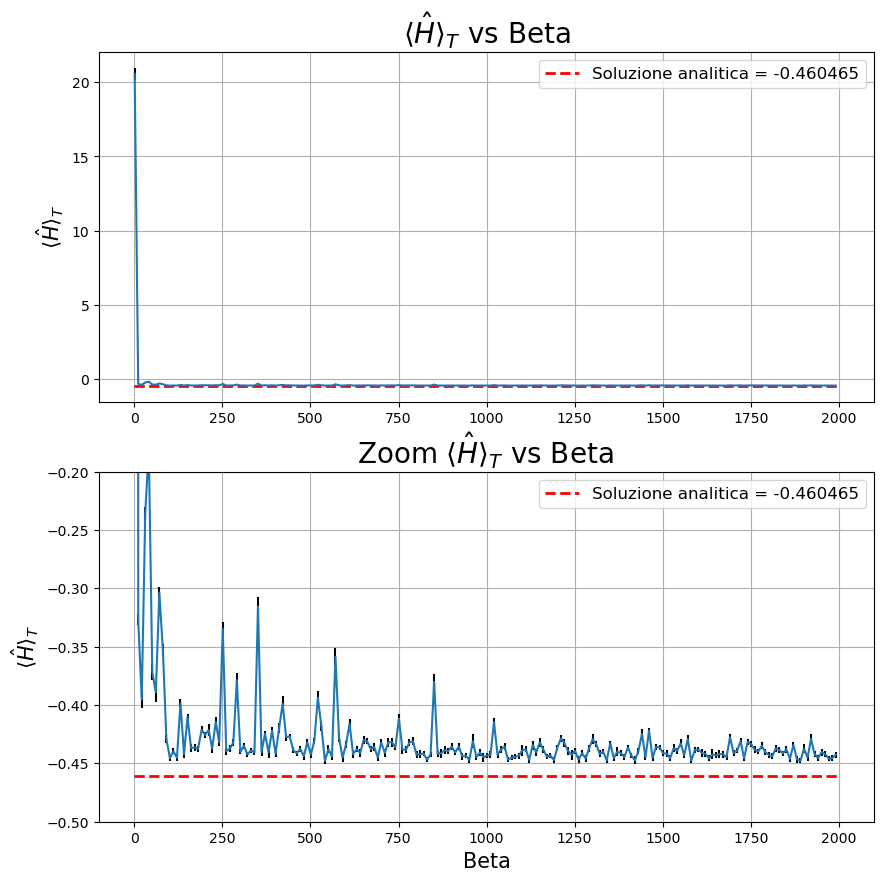

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#plt.figure(figsize=(16, 5))
plt.figure(figsize=(10, 10))
beta, mu, sigma, H_average, H_error = np.loadtxt("es8.2/SimulatedAnnealing_results.out", 
                                                 usecols=(0, 1, 2, 3, 4), unpack=True, delimiter=' ')
plt.subplot(2, 1, 1)
plt.errorbar(beta,H_average,yerr=H_error, ecolor='black')
plt.title(r'$\langle {\hat H} \rangle_T$ vs Beta', fontsize=20)
plt.grid(True)
plt.hlines(-0.46046587969271513, 0, 2000, colors='r', linestyles='dashed', linewidth =2, 
           label = "Soluzione analitica = -0.460465")
#plt.xlabel('Beta', fontsize=15)
plt.ylabel(r'$\langle {\hat H} \rangle_T$', fontsize=15)
plt.legend(fontsize="12")

plt.subplot(2, 1, 2)
plt.errorbar(beta,H_average,yerr=H_error, ecolor='black')
plt.title(r'Zoom $\langle {\hat H} \rangle_T$ vs Beta ', fontsize=20)
plt.grid(True)
plt.hlines(-0.46046587969271513, 0, 2000, colors='r', linestyles='dashed', linewidth =2, 
           label = "Soluzione analitica = -0.460465")
plt.xlabel('Beta', fontsize=15)
plt.ylabel(r'$\langle {\hat H} \rangle_T$', fontsize=15)
plt.ylim(top=-0.2, bottom =-0.5)
plt.legend(fontsize="12")

plt.show()

Possiamo osservare come il valore di aspettazione di H converga verso quello analitico con errori cosi' piccoli da non essere visibili nemmeno nel plot zommato. Abbiamo effettuato, infatti, un secondo plot con un limite sull'asse delle y cosi' da apprezzare meglio eventuali oscillazioni intorno al valore analitico. Vediamo che il nostro valore oscilla intorno a -0.44 e si mantiene superiore al valore analitico. 

Plottiamo, ora, la traiettoria che l'algoritmo di Simulated Annealing effettua nello spazio dei parametri per osservare l'andamento di $\mu$ e $\sigma$ in funzione degli step del SA.

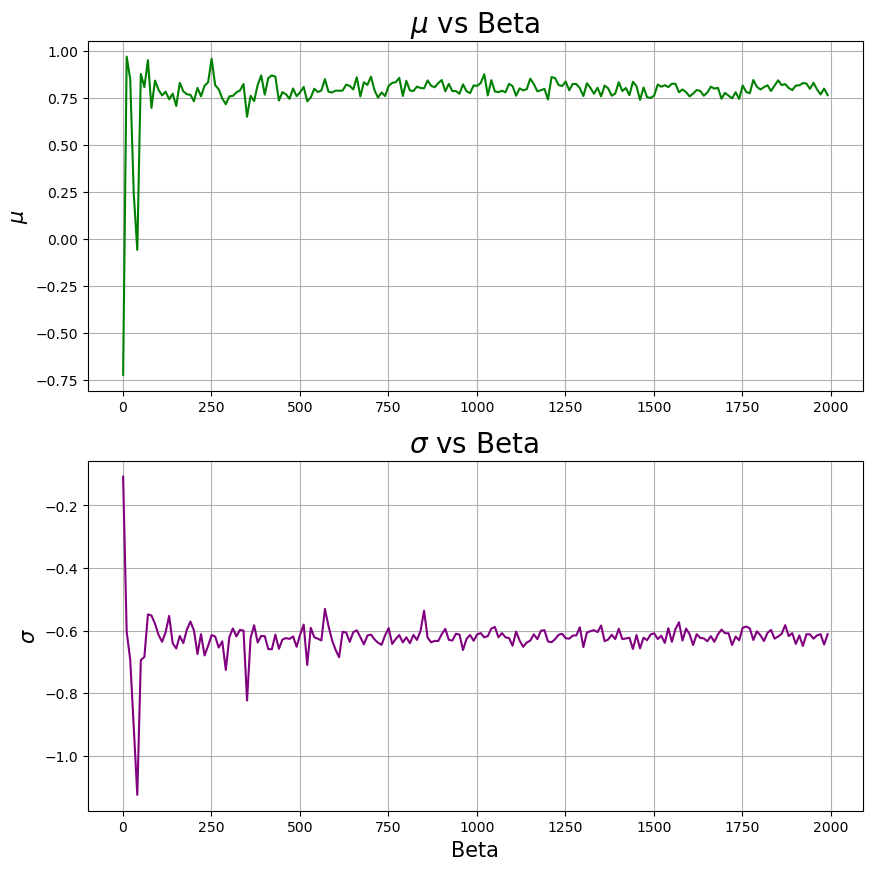

In [3]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(beta,mu, color='green')
plt.title(r'$\mu$ vs Beta', fontsize=20)
plt.grid(True)
#plt.xlabel('Beta', fontsize=15)
plt.ylabel(r'$\mu$', fontsize=15)

plt.subplot(2, 1, 2)
plt.plot(beta,sigma, color='purple')
plt.title(r'$\sigma$ vs Beta ', fontsize=20)
plt.grid(True)
plt.xlabel('Beta', fontsize=15)
plt.ylabel(r'$\sigma$', fontsize=15)

plt.show()

Ora che abbiamo effettuato la nostra stima dei valori ottimali di $\mu$ e $\sigma$, pari a $\mu = 0.766267$ e $\sigma = -0.610944$,  che approssimano al meglio l'energia del Gs del nostro sistema e aver osservato come il SA giunge a questi valori, possiamo svolgere una semplice simulazione priva di SA con questi parametri utilizzando il codice prodotto nell'esercizio 8.1 che, a fissati $\mu$ e $\sigma$ settati nel file di input, ci fornisce l'andamento di $\langle {\hat H} \rangle_T$ in funzione del numero di blocchi. Utilizziamo, come in precedenza, 100 blocchi da 1000 step ciascuno e plottiamo la media progressiva nei blocchi. Nello svolgere questa simulazone dovremo adattare la grandezza dell'intervallo in cui puo' essere "pescato" lo spostamento da $x_{old}$ affinche' l'acceptance rate rimanga del 50%.

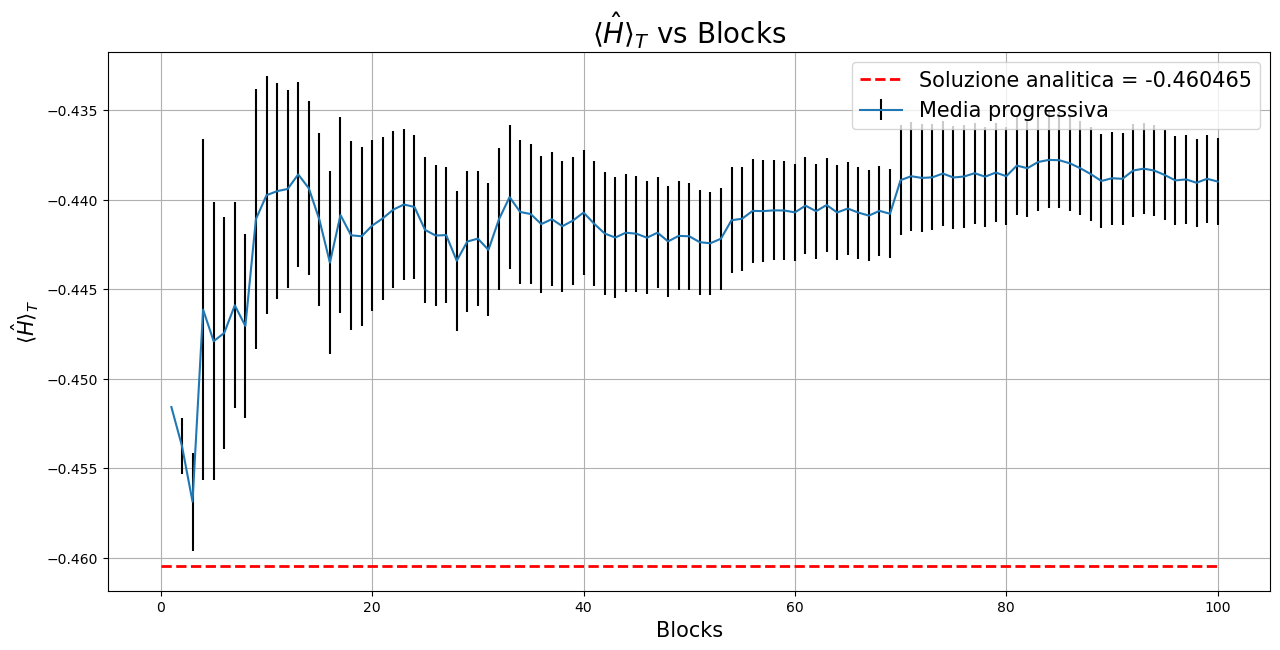

In [12]:
N =100
x = np.arange(N)+1  

plt.figure(figsize=(15,7))
block, H_average, H_error = np.loadtxt("es8.1/energy_results.out", usecols=(0, 2, 3), unpack=True, delimiter=' ')
plt.errorbar(x,H_average,yerr=H_error, ecolor='black', label='Media progressiva ') #, marker = '*', markersize = '10'
plt.title(r'$\langle {\hat H} \rangle_T$ vs Blocks', fontsize=20) 
plt.grid(True)
plt.hlines(-0.46046587969271513, 0, 100, colors='r', linestyles='dashed', linewidth =2, 
           label = "Soluzione analitica = -0.460465")
plt.xlabel('Blocks', fontsize=15)
plt.ylabel(r'$\langle {\hat H} \rangle_T$', fontsize=15)
plt.legend(fontsize="15")

plt.show()

Possiamo osservare come il valore medio dell'energia oscilli intorno a -0.44 mantenendosi lontano dal valore analitico. Abbiamo effettuato anche altre simulazioni modificando il numero totale di passi e notiamo che, all'aumentare di quest'ultimo $\langle {\hat H} \rangle_T$ oscilla con errori sempre piu' piccoli intorno a 0.44, mentre riducendoli osserviamo una oscillazione intorno valori leggermente inferiori di -0.44. \
Riusciamo a convergere al valore analitico solo se riduciamo drasticamente il numero totale di tentativi fino a 5000.

Mostriamo, infine, l'andamento della $|\Psi_T(x)|^2$ campionata utilizzando i valori ottimali di $\mu$ e $\sigma$. Sostanzialmente, aggiungiamo al codice 8.1 la scrittura su file delle posizioni, accettate o meno, della particella per ogni step del data blocking: con queste $10^6$ posizioni riempiamo un istogramma cosi' da osservare l'andamento del modulo quadro della funzione d'onda del Gs del nostro sistema. \
La confrontiamo, inoltre, con la soluzione numerica, ottenuta trasformando la Equazione di Schrodinger in una equazione matriciale e calcolandone autovalori e autovettori, per verificare la compatibilita' tra le due.

<function matplotlib.pyplot.show(close=None, block=None)>

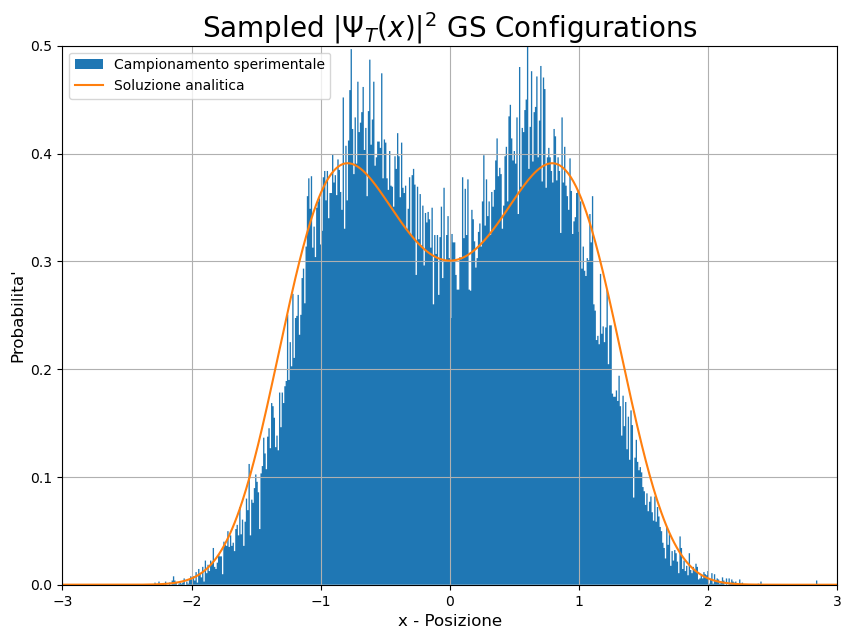

In [33]:
#Sampled
plt.figure(figsize=(10,7))
psi_position= np.loadtxt("es8.1/position_results.out", usecols=(0), unpack=True)
plt.hist(psi_position, bins=500, density = 'true', histtype = 'stepfilled', label = 'Campionamento sperimentale') 


#Analytical
def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N) #vettore di double
dx = x[1] - x[0] # the step size
V = Vpot(x) #calcolo epot in ogni punto di x

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)
# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)
plt.plot(x,(psi[0])**2, label='Soluzione analitica')
plt.xlim((-3,3))
plt.ylim(top=0.5)
    
plt.title ("Sampled $|\Psi_T(x)|^2$ GS Configurations", fontsize =20)
plt.grid(True)
plt.legend(loc= 'upper left')
plt.ylabel ("Probabilita'", fontsize =12)
plt.xlabel ("x - Posizione", fontsize=12)

plt.show